# Mounting the google drive 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

#for importing data from drive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [2]:
#mounting the drive
#from google.colab import drive
#drive.mount('/content/gdrive')
dataset_directory = './dataset'

In [3]:
# Importing the dataset 

In [4]:
# Importing the dataset 

In [5]:
# Importing the dataset 

# Importing the dataset 

In [6]:
import os
from pathlib import Path
from keras.preprocessing import image

#getting the directory names and filenames from the CV set
image_data= []
labels={"no":0,"yes":1}


for dirname,_,filenames in os.walk(dataset_directory):
  type_of_image = (str(dirname).split('/')[-1])
  for filename in filenames:
    # print(os.path.join(dirname,filename))
    img = image.load_img(os.path.join(dirname,filename),target_size=(256,256))
    image_array = image.img_to_array(img)/255
    image_data.append((image_array,type_of_image))
    # directory of loaded image 
    print("processing image: " + str(dirname)+" / "+str(filename))

print("data is loaded")

processing image: ./dataset/no / 30 no.jpg
processing image: ./dataset/no / 22 no.jpg
processing image: ./dataset/no / 41 no.jpg
processing image: ./dataset/no / 14 no.jpg
processing image: ./dataset/no / no 10.jpg
processing image: ./dataset/no / 18 no.jpg
processing image: ./dataset/no / no 9.png
processing image: ./dataset/no / no 7.jpeg
processing image: ./dataset/no / no 8.jpg
processing image: ./dataset/no / no.jpg
processing image: ./dataset/no / 3 no.jpg
processing image: ./dataset/no / 43 no.jpg
processing image: ./dataset/no / 20 no.jpg
processing image: ./dataset/no / 32 no.jpg
processing image: ./dataset/no / 2 no.jpeg
processing image: ./dataset/no / N15.jpg
processing image: ./dataset/no / no 99.jpg
processing image: ./dataset/no / no 98.jpg
processing image: ./dataset/no / No11.jpg
processing image: ./dataset/no / 7 no.jpg
processing image: ./dataset/no / 12 no.jpg
processing image: ./dataset/no / No13.jpg
processing image: ./dataset/no / 44no.jpg
processing image: ./dat

processing image: ./dataset/yes / Y70.jpg
processing image: ./dataset/yes / Y58.JPG
processing image: ./dataset/yes / Y160.JPG
processing image: ./dataset/yes / Y148.JPG
processing image: ./dataset/yes / Y164.JPG
processing image: ./dataset/yes / Y170.JPG
processing image: ./dataset/yes / Y158.JPG
processing image: ./dataset/yes / Y9.jpg
processing image: ./dataset/yes / Y74.jpg
processing image: ./dataset/yes / Y60.jpg
processing image: ./dataset/yes / Y49.JPG
processing image: ./dataset/yes / Y61.jpg
processing image: ./dataset/yes / Y75.JPG
processing image: ./dataset/yes / Y8.jpg
processing image: ./dataset/yes / Y159.JPG
processing image: ./dataset/yes / Y165.JPG
processing image: ./dataset/yes / Y167.JPG
processing image: ./dataset/yes / Y77.jpg
processing image: ./dataset/yes / Y76.jpg
processing image: ./dataset/yes / Y62.jpg
processing image: ./dataset/yes / Y89.JPG
processing image: ./dataset/yes / Y166.JPG
data is loaded


In [7]:
print("number of trainning images =",end=" ")
print(len(image_data))

number of trainning images = 253


# Data Preprocessing 

In [8]:
import random 
random.seed(1)
# random shuffling of image data 
random.shuffle(image_data)
train = image_data[:int(0.90*len(image_data))]
validation = image_data[int(0.90*len(image_data)):]

In [9]:
# Spliting of x_train and y_train 
x_train = np.asarray([data[0] for data in train])
y_train_decoded = np.asarray([labels[data[1]] for data in train])
y_train = tf.keras.utils.to_categorical(y_train_decoded) # encoding to one hot vector 
# Spliting of x_val and y_val 
x_val = np.asarray([data[0] for data in validation])
y_val_decoded = np.asarray([labels[data[1]] for data in validation])
y_val = tf.keras.utils.to_categorical(y_val_decoded)  # encoding to one hot vector 
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

227
227
26
26


Counter({1: 137, 0: 90})
Counter({1: 18, 0: 8})


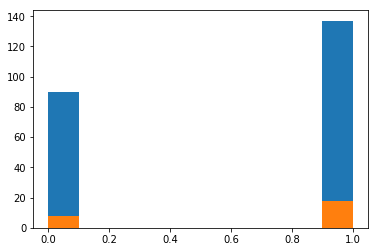

In [10]:
from collections import Counter 
import matplotlib.pyplot as plt
plt.hist(y_train_decoded)
plt.plot()
print(Counter(y_train_decoded))
plt.hist(y_val_decoded)
plt.plot()
print(Counter(y_val_decoded))

yes


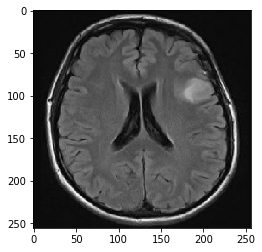

In [11]:
# printing a trainning image 
plt.imshow(image_data[8][0])
print(image_data[8][1])

In [12]:

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2,  activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 460800)            0

In [13]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip= True,  # randomly flip images
        vertical_flip= True )  # randomly flip images


datagen.fit(x_train)

In [14]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=86),
                              epochs = 10, validation_data = (x_val,y_val))


Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5273

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)



In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 



In [ ]:
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=1)

In [ ]:
model.save("./td_web/model2")
print("Saved model to disk") 

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/model')

In [ ]:
# import shutil
# shutil.make_archive('model', 'zip', 'model')